# Video Game Sales & Reviews From 1980-2016

The purpose of this Notebook is to clean and visualize the sales and reviews of video games sold up until December 2016. 

In [294]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

games = pd.read_csv('VG_Sales_2016.csv')

games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [295]:
games.loc[(games['Year_of_Release'] == 2017)]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.04,0.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16385,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
games = games[games.Year_of_Release != 2017]

In [297]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8579
Critic_Count       8579
User_Score         6701
User_Count         9126
Developer          6620
Rating             6766
dtype: int64

That's quite a lot of missing data under the reviews part of this dataframe. Let's average out as many NAN's as possible.

## Data Cleaning

Here, I'll average the Critic Count and User Count values out by taking into account of which Publisher these games are categorized under.

In [298]:
games["Critic_Count"] = (games["Critic_Count"].fillna(games.groupby("Publisher")["Critic_Count"].transform("mean")))
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.000000,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,42.029032,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.000000,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.000000,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,42.029032,NaN,NaN,NaN,NaN


In [299]:
games["User_Count"] = (games["User_Count"].fillna(games.groupby("Publisher")["User_Count"].transform("mean")))
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.000000,8,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,42.029032,NaN,197.812925,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.000000,8.3,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.000000,8,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,42.029032,NaN,197.812925,NaN,NaN


In [300]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8579
Critic_Count        913
User_Score         6701
User_Count         1036
Developer          6620
Rating             6766
dtype: int64

In [301]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Here lies a little bit of a problem. I'm eventually going to want to aggregate the User_Score column for one of the graphs later in this notebook. So let's change it to a float64 data type for consistency. But first we need to replace all the NaN values to the mean User_scores. But we also need to take into account to not average out the NAN's with values from the column in which they come from. That would disrupt our data. Instead, for example, the NAN's in the Critic_Score column will be averaged by which Publisher the game was distributed by.
Also, we want to replace the tbd values to zero first, then replace them with the averages, or else we'll be bumping into some errors (which I have ran into and will not display for the sake of orginization).

In [302]:
#For Critic Scores
games["Critic_Score"] = (games["Critic_Score"].fillna(games.groupby("Publisher")["Critic_Score"].transform("mean")))
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,75.525806,42.029032,NaN,197.812925,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,75.525806,42.029032,NaN,197.812925,NaN,NaN


In [303]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score        913
Critic_Count        913
User_Score         6701
User_Count         1036
Developer          6620
Rating             6766
dtype: int64

In [304]:
games = games.replace({'tbd': 0})
games

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,75.525806,42.029032,NaN,197.812925,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.3,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,75.525806,42.029032,NaN,197.812925,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,75.525806,42.029032,NaN,197.812925,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.000000,65.000000,8.5,431.000000,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.000000,41.000000,6.6,129.000000,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.000000,80.000000,8.4,594.000000,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,75.525806,42.029032,NaN,197.812925,NaN,NaN


In [305]:
games = games.astype({'User_Score': 'float64'})

In [306]:
games.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

In [307]:
#For User Scores
games["User_Score"] = (games["User_Score"].fillna(games.groupby("Publisher")["User_Score"].transform("mean")))
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,75.525806,42.029032,7.485852,197.812925,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,75.525806,42.029032,7.485852,197.812925,NaN,NaN


In [308]:
games.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score        913
Critic_Count        913
User_Score          764
User_Count         1036
Developer          6620
Rating             6766
dtype: int64

Great! We have significantly reduced the amount of missing values that would have affected our visualizations for later on in this notebook.

Let's look at our categorical values - Genre, Rating, Platform, Publisher, and Developer

In [170]:
games.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [171]:
games.Rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [172]:
games.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [309]:
x = games.Publisher.unique()
x[1:10]

array(['Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft'],
      dtype=object)

In [174]:
games.Developer.unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

## Data Visualization

In [130]:
releases = games.Year_of_Release.value_counts()
releases.head()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
Name: Year_of_Release, dtype: int64

In [191]:
sns.set(rc={'figure.figsize':(10,8)})

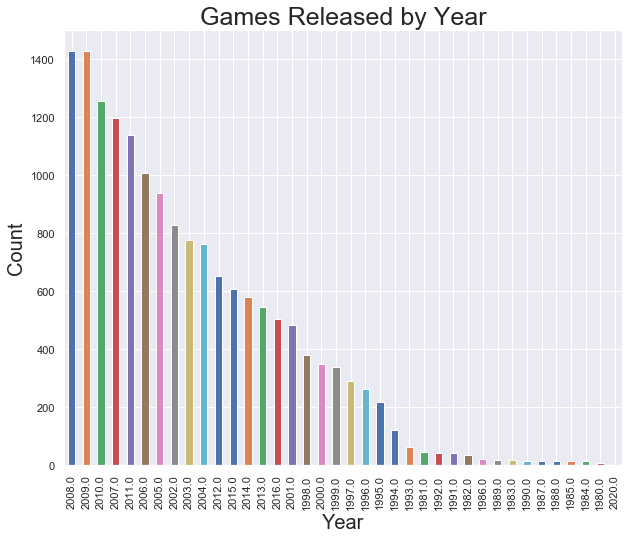

In [132]:
vis_1 = releases.plot(kind = 'bar')
vis_1.set_title('Games Released by Year', fontsize=25)
vis_1.set_xlabel('Year', fontsize=20)
_=vis_1.set_ylabel('Count', fontsize=20)

We see here that 2008 and 2009 were pretty ripe years for game releases. But how did the global sales turn out during these years?

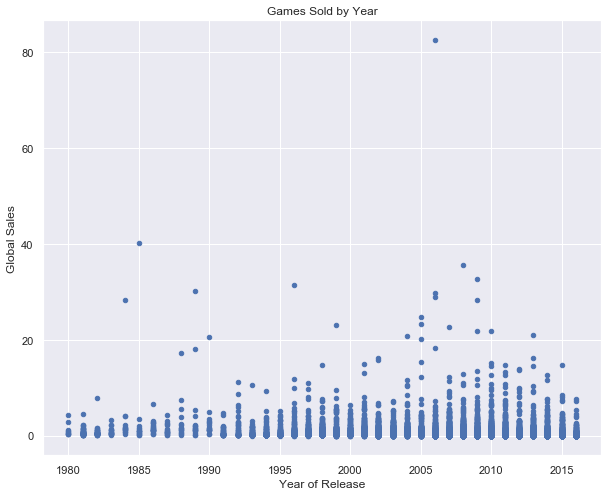

In [192]:
#Let's plot how many games were sold in each year.
vis_2 = games.plot(kind="scatter", x='Year_of_Release', y='Global_Sales')

vis_2.set_title('Games Sold by Year')
vis_2.set_xlabel('Year of Release')
_=vis_2.set_ylabel('Global Sales')

Now this is interesting. Our data set is only supposed to contain data until late 2016. Not only that, but as of creating this project, it is only Dec 2019, so 2020 hasn't even arrived yet! Let's look into our data to see what's going on and try to correct it.

In [193]:
games[games['Year_of_Release'].astype(str).str.contains('2020')]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


Okay, so a simple google search said that Imagine: Makeup Artist for the Nintendo DS came out in 2009. Let's fix this year of release date now.

In [194]:
games.iloc[5936, 2] = 2009.0
games.iloc[5936]

Name               Imagine: Makeup Artist
Platform                               DS
Year_of_Release                      2009
Genre                          Simulation
Publisher                         Ubisoft
NA_Sales                             0.27
EU_Sales                                0
JP_Sales                                0
Other_Sales                          0.02
Global_Sales                         0.29
Critic_Score                      68.5143
Critic_Count                      25.2849
User_Score                              0
User_Count                        154.388
Developer                         Ubisoft
Rating                                  E
Name: 5936, dtype: object

Wonderful! Now to double check to see if games released in 2020 are gone from our data set...

In [136]:
games[games['Year_of_Release'].astype(str).str.contains('2020')]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating


And nothing appears! Great, now we can visualize how many games were sold in each year again.

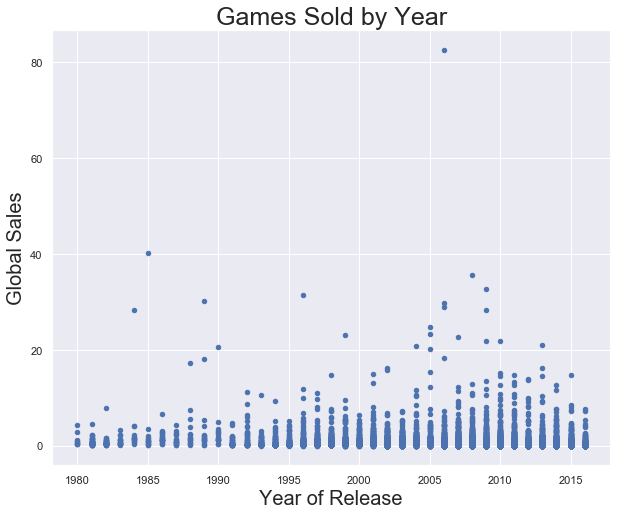

In [195]:
vis_2 = games.plot(kind="scatter", x='Year_of_Release', y='Global_Sales')
vis_2.set_title('Games Sold by Year', fontsize=25)
vis_2.set_xlabel('Year of Release', fontsize=20)
_=vis_2.set_ylabel('Global Sales', fontsize=20)

Great! But we can do even better. The scatter plot doesn't seem to sufficiently represent the total amount of Global Sales per year. So let's try another representation...
In the next code cell, we'll sum up all of the Global Sales for each respective year and store them in a new data frame.

In [196]:
global_sales = []
years = []
for i in range(1980, 2017):
    a = games.loc[(games['Year_of_Release'] == i), 'Global_Sales'].sum()
    global_sales.append(a)
    years.append(i)

data = {'Years': years,
        'Global Sales': global_sales}
df = pd.DataFrame()
df = pd.DataFrame(data)
df.head()

,Years,Global Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36


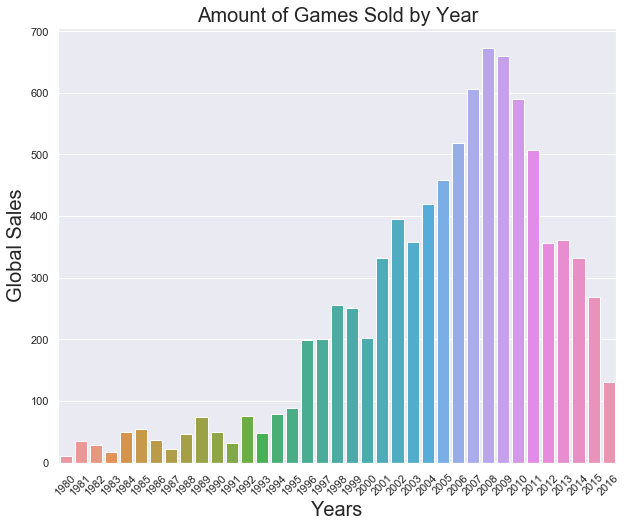

In [197]:
vis_2 = sns.barplot(x="Years", y="Global Sales", data=df)
vis_2.set_title('Amount of Games Sold by Year', fontsize=20)
vis_2.set_xlabel('Years', fontsize=20)
vis_2.set_ylabel('Global Sales', fontsize=20)
_ = vis_2.set_xticklabels(vis_2.get_xticklabels(), rotation=45)

Now that's more like it. Here we can easily see that the higher amount of games released, then the higher amount of games are sold in those years, especially in years 2008 and 2009. There's still some ambiguity here in terms of which publisher is succeeding the most in terms of games sold. Let's look into it.

In [147]:
#This code helps you visualize the publishers that have sold the most of all the years combined. Should we visualize?
publisher = games.Publisher.unique()
publisher[3]
GS_pub=[]
x = len(publisher)
for i in publisher:
    a = games.loc[(games['Publisher'] == i), 'Global_Sales'].sum()
    GS_pub.append(a)

data = {'Publisher': publisher,
        'Global Sales': GS_pub}
df = pd.DataFrame()
df = pd.DataFrame(data)
df = df.nlargest(10, 'Global Sales')

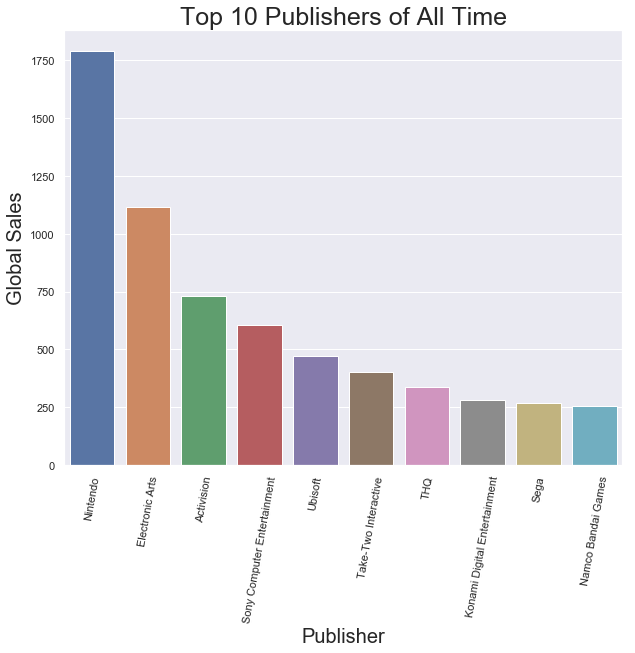

In [153]:
vis_3 = sns.barplot(x="Publisher", y="Global Sales", data=df)
vis_3.set_title('Top 10 Publishers of All Time', fontsize=25)
vis_3.set_xlabel('Publisher', fontsize=20)
vis_3.set_ylabel('Global Sales', fontsize=20)
_ = vis_3.set_xticklabels(vis_3.get_xticklabels(), rotation=80)

Looking at the chart above, we can clearly see that Nintendo beats out all other publishers when considering all the years combined. We can look even more specifically into each year of which publisher sells the most for each year.

In [158]:
#Here, we single out the Year, Publisher, and Global Sales columns and aggregate all the global sales for each
#publisher for each year.
pub = games.groupby(['Year_of_Release', 'Publisher'], as_index=False).agg({'Global_Sales':'sum'})
pub.head()

,Year_of_Release,Publisher,Global_Sales
0,1980.0,Activision,3.02
1,1980.0,Atari,8.36
2,1981.0,20th Century Fox Video Games,1.35
3,1981.0,Activision,8.50
4,1981.0,Atari,8.45


In [160]:
#Now we take the above data frame and take it even further by selecting the Publishers that had the highest
#Global Sales for that specific year.
pubx = pub[pub['Global_Sales'] == pub.groupby('Year_of_Release')['Global_Sales'].transform('max')]
pubx.head()

,Year_of_Release,Publisher,Global_Sales
1,1980.0,Atari,8.36
3,1981.0,Activision,8.50
19,1982.0,Atari,19.43
36,1983.0,Nintendo,10.96
41,1984.0,Nintendo,45.56


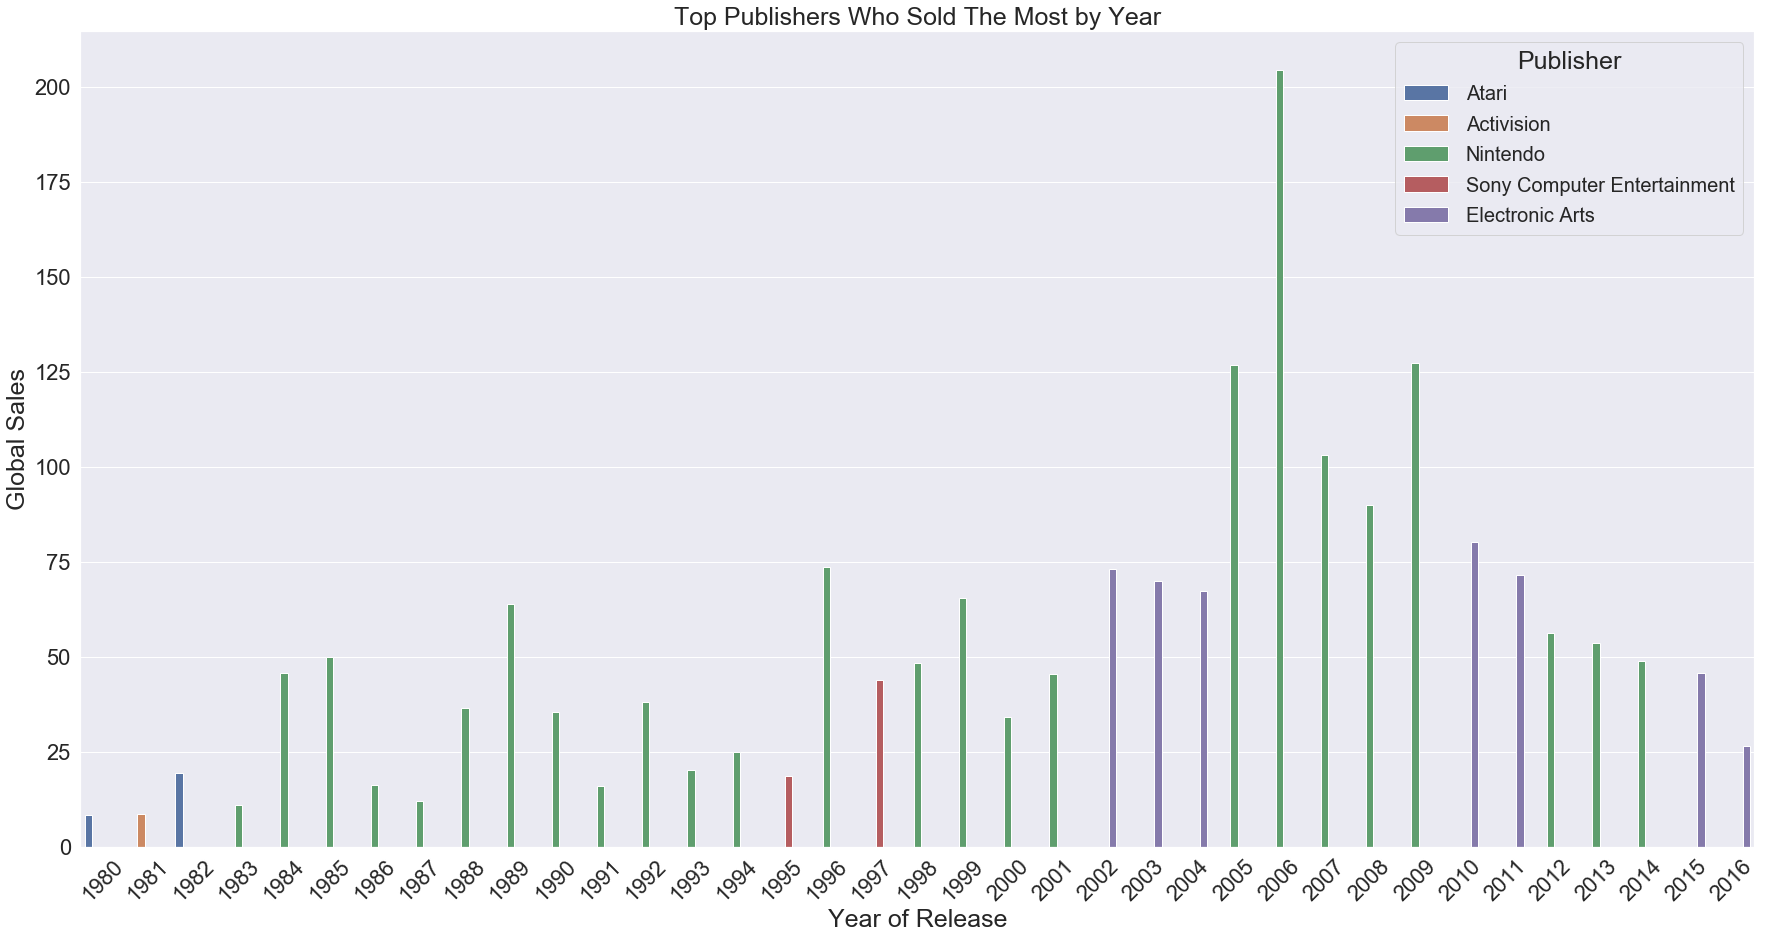

In [200]:
sns.set(rc={'figure.figsize':(30,15)})
sns.set(font_scale=2)
vis_4 = sns.barplot(x='Year_of_Release', y='Global_Sales', hue='Publisher', data=pubx)
vis_4.set_title('Top Publishers Who Sold The Most by Year', fontsize=25)
vis_4.set_xlabel('Year of Release', fontsize=25)
vis_4.set_ylabel('Global Sales', fontsize=25)
vis_4.set_xticklabels(vis_2.get_xticklabels(), rotation=45)
plt.setp(vis_4.get_legend().get_texts(), fontsize='20') # for legend text
_ = plt.setp(vis_4.get_legend().get_title(), fontsize='25') # for legend title

From this chart, we see Nintendo dominates almost ever year since dating back since 1983. Not bad if you ask me...
How about developers?

In [201]:
dev = games.Developer.unique()
GS_dev=[]
x = len(dev)
for i in dev:
    a = games.loc[(games['Developer'] == i), 'Global_Sales'].sum()
    GS_dev.append(a)

data = {'Developer': dev,
        'Global Sales': GS_dev}
df = pd.DataFrame()
df = pd.DataFrame(data)
df = df.nlargest(10, 'Global Sales')

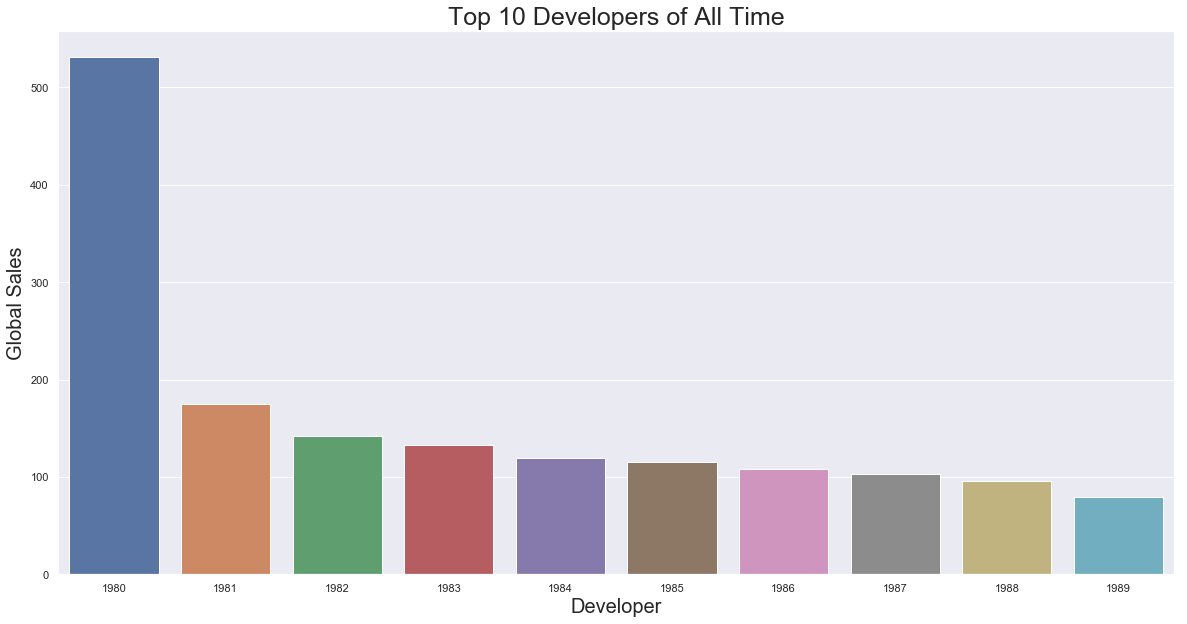

In [203]:
sns.set(rc={'figure.figsize':(20,10)})
vis_5 = sns.barplot(x="Developer", y="Global Sales", data=df)
vis_5.set_title('Top 10 Developers of All Time', fontsize=25)
vis_5.set_xlabel('Developer', fontsize=20)
vis_5.set_ylabel('Global Sales', fontsize=20)
_ = vis_5.set_xticklabels(vis_2.get_xticklabels())

Nintendo comes out on top once more! Now looking into the specifics of each year:

In [204]:
devs = games.groupby(['Year_of_Release', 'Developer'], as_index=False).agg({'Global_Sales':'sum'})
devs.head()

,Year_of_Release,Developer,Global_Sales
0,1985.0,"Viva Media, Viva Media, LLC",0.03
1,1988.0,Maxis,0.03
2,1992.0,Trilobyte,0.78
3,1992.0,id Software,0.03
4,1994.0,Tamsoft,1.27


In [205]:
devx = devs[devs['Global_Sales'] == devs.groupby('Year_of_Release')['Global_Sales'].transform('max')]
devx.head()

,Year_of_Release,Developer,Global_Sales
0,1985.0,"Viva Media, Viva Media, LLC",0.03
1,1988.0,Maxis,0.03
2,1992.0,Trilobyte,0.78
4,1994.0,Tamsoft,1.27
9,1996.0,Namco,5.74


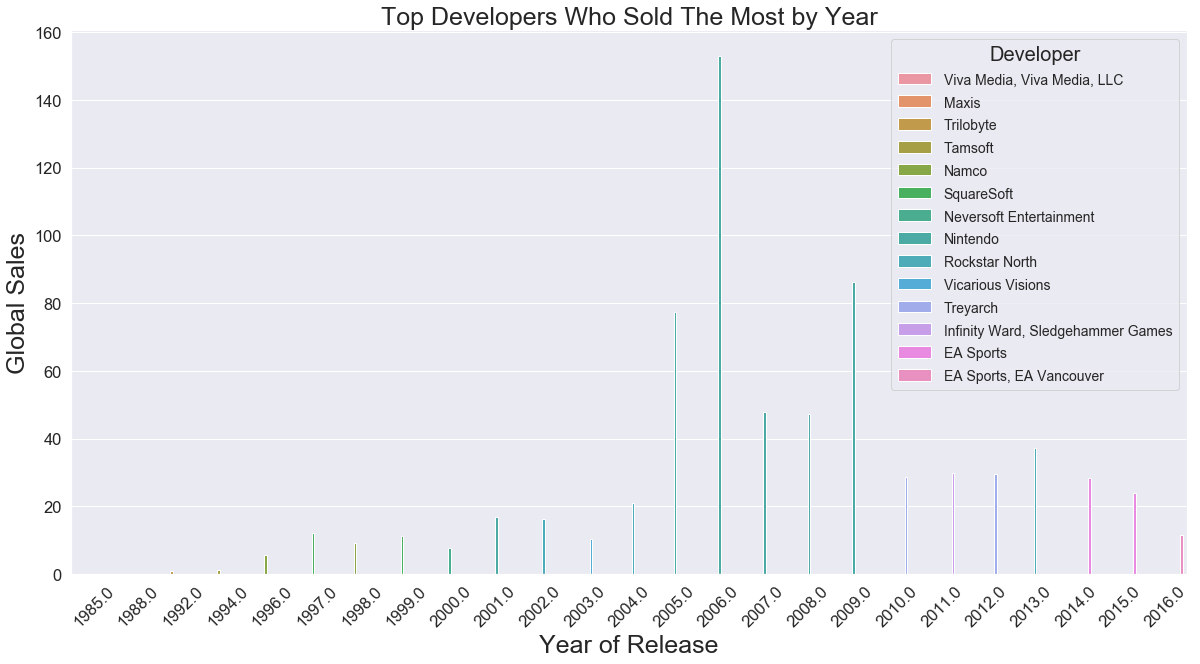

In [207]:
sns.set(font_scale=1.5)
vis_5 = sns.barplot(x='Year_of_Release', y='Global_Sales', hue='Developer', data=devx)
vis_5.set_title('Top Developers Who Sold The Most by Year', fontsize=25)
vis_5.set_xlabel('Year of Release', fontsize=25)
vis_5.set_ylabel('Global Sales', fontsize=25)
vis_5.set_xticklabels(vis_5.get_xticklabels(), rotation=45)
plt.setp(vis_5.get_legend().get_texts(), fontsize=14) # for legend text
_ = plt.setp(vis_5.get_legend().get_title(), fontsize=20) # for legend title

Now let's look at games that sold the most by genre.

In [208]:
genre = games.groupby(['Year_of_Release', 'Genre'], as_index=False).agg({'Global_Sales':'sum'})
genre.head()

,Year_of_Release,Genre,Global_Sales
0,1980.0,Action,0.34
1,1980.0,Fighting,0.77
2,1980.0,Misc,2.71
3,1980.0,Shooter,7.07
4,1980.0,Sports,0.49


In [209]:
genrex = genre[genre['Global_Sales'] == genre.groupby('Year_of_Release')['Global_Sales'].transform('max')]
genrex.head()

,Year_of_Release,Genre,Global_Sales
3,1980.0,Shooter,7.07
5,1981.0,Action,14.84
15,1982.0,Puzzle,10.03
22,1983.0,Platform,6.93
31,1984.0,Shooter,31.10


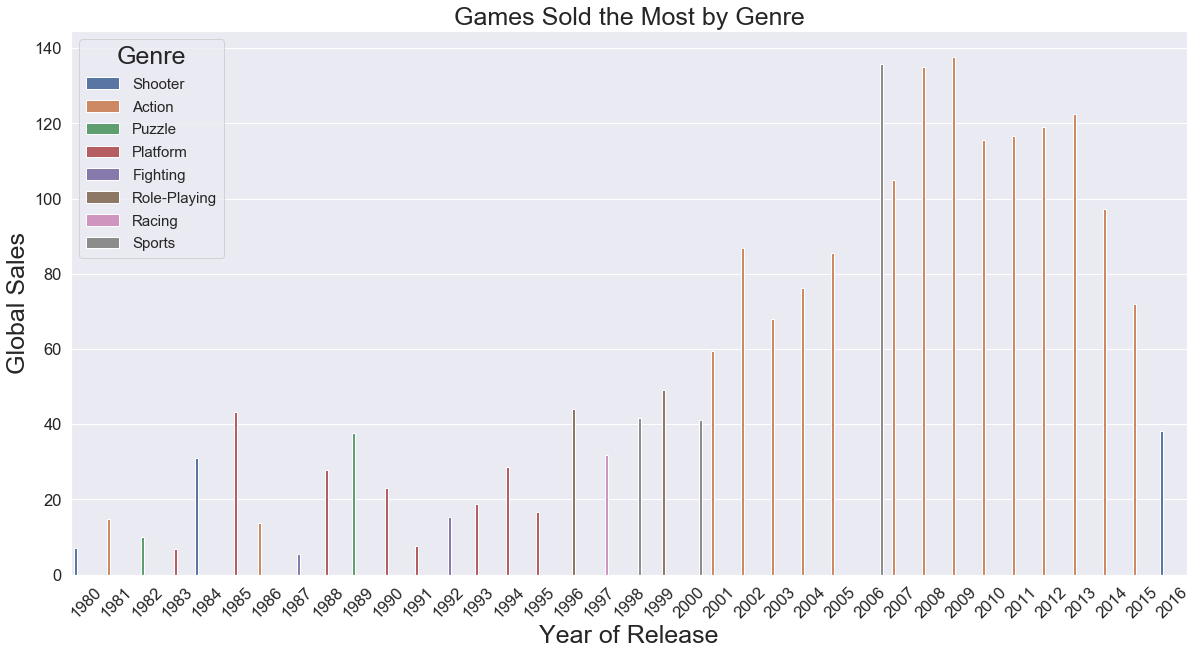

In [213]:
sns.set(font_scale=1.5)
vis_6 = sns.barplot(x='Year_of_Release', y='Global_Sales', hue='Genre', data=genrex)
vis_6.set_title('Games Sold the Most by Genre', fontsize=25)
vis_6.set_xlabel('Year of Release', fontsize=25)
vis_6.set_ylabel('Global Sales', fontsize=25)
vis_6.set_xticklabels(vis_2.get_xticklabels(), rotation=45)
plt.setp(vis_6.get_legend().get_texts(), fontsize=15) # for legend text
_ = plt.setp(vis_6.get_legend().get_title(), fontsize=25) # for legend title

Action games tend to win people's hearts dating back since the early 2000's. Its quite interesting because that is around the time when video game consoles started introducing 3D visuals, a field where an action game could thrive in. It makes more sense for the 90's to have Platform type games to dominate a little more, given the 2D landscape nature of graphical limitations.

Let's take a look at which Platforms sold the most during these years.

In [214]:
platform = games.groupby(['Year_of_Release', 'Platform'], as_index=False).agg({'Global_Sales':'sum'})
platform.head()

,Year_of_Release,Platform,Global_Sales
0,1980.0,2600,11.38
1,1981.0,2600,35.77
2,1982.0,2600,28.86
3,1983.0,2600,5.83
4,1983.0,NES,10.96


In [215]:
platformx = platform[platform['Global_Sales'] == platform.groupby('Year_of_Release')['Global_Sales'].transform('max')]
platformx.head()

,Year_of_Release,Platform,Global_Sales
0,1980.0,2600,11.38
1,1981.0,2600,35.77
2,1982.0,2600,28.86
4,1983.0,NES,10.96
6,1984.0,NES,50.09


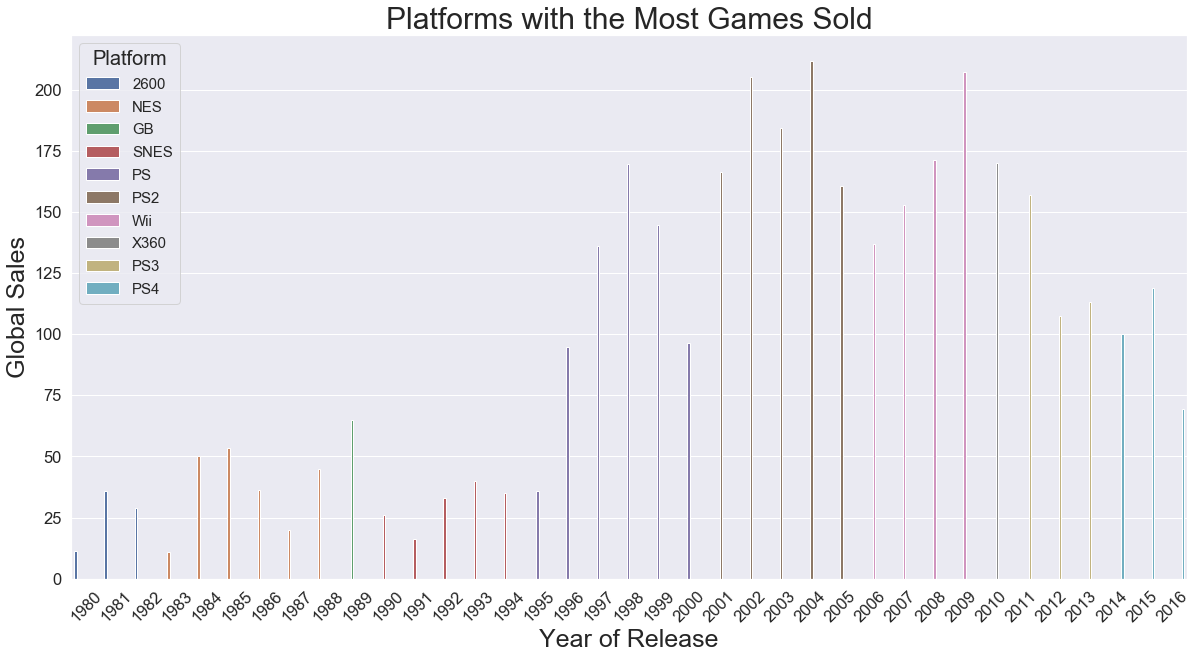

In [217]:
sns.set(font_scale=1.5)
vis_7 = sns.barplot(x='Year_of_Release', y='Global_Sales', hue='Platform', data=platformx)
vis_7.set_title('Platforms with the Most Games Sold', fontsize=30)
vis_7.set_xlabel('Year of Release', fontsize=25)
vis_7.set_ylabel('Global Sales', fontsize=25)
vis_7.set_xticklabels(vis_2.get_xticklabels(), rotation=45)
plt.setp(vis_7.get_legend().get_texts(), fontsize=15) # for legend text
_ = plt.setp(vis_7.get_legend().get_title(), fontsize=20) # for legend title

Looks like Sony dominated for 10 years with their consoles Playstation 1 and 2 in the years of 1995 to 2005. It wasn't until 2006 when Nintendo released the Wii which shook the landscape of gaming for quite some time.
Let's compare the amount of games released and sold by Publishers in the following two charts.

In [218]:
pub_released = games['Publisher'].value_counts().head(10)
pub_released

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
THQ                              715
Nintendo                         706
Sony Computer Entertainment      687
Sega                             636
Take-Two Interactive             422
Name: Publisher, dtype: int64

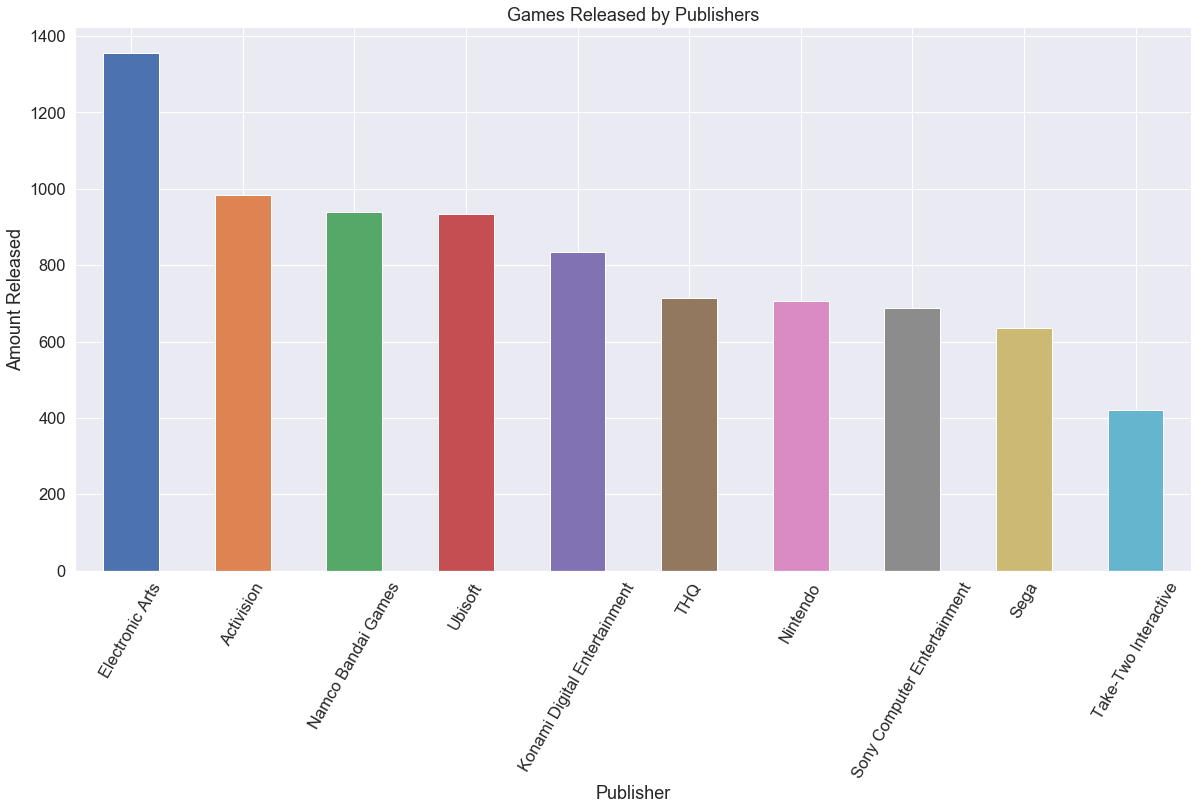

In [225]:
vis_8 = pub_released.plot(kind = 'bar')
vis_8.set_title('Games Released by Publishers')
vis_8.set_xlabel('Publisher')
vis_8.set_ylabel('Amount Released')
_=vis_8.set_xticklabels(vis_8.get_xticklabels(), rotation=60)

In [220]:
pub_sales = games.groupby('Publisher', as_index=False).agg({'Global_Sales':'sum'})
pub_salesx = pub_sales.nlargest(10, 'Global_Sales')
pub_salesx

,Publisher,Global_Sales
361,Nintendo,1788.81
139,Electronic Arts,1116.96
21,Activision,731.16
458,Sony Computer Entertainment,606.48
528,Ubisoft,471.61
497,Take-Two Interactive,403.82
491,THQ,338.44
277,Konami Digital Entertainment,282.39
448,Sega,270.30
349,Namco Bandai Games,254.62


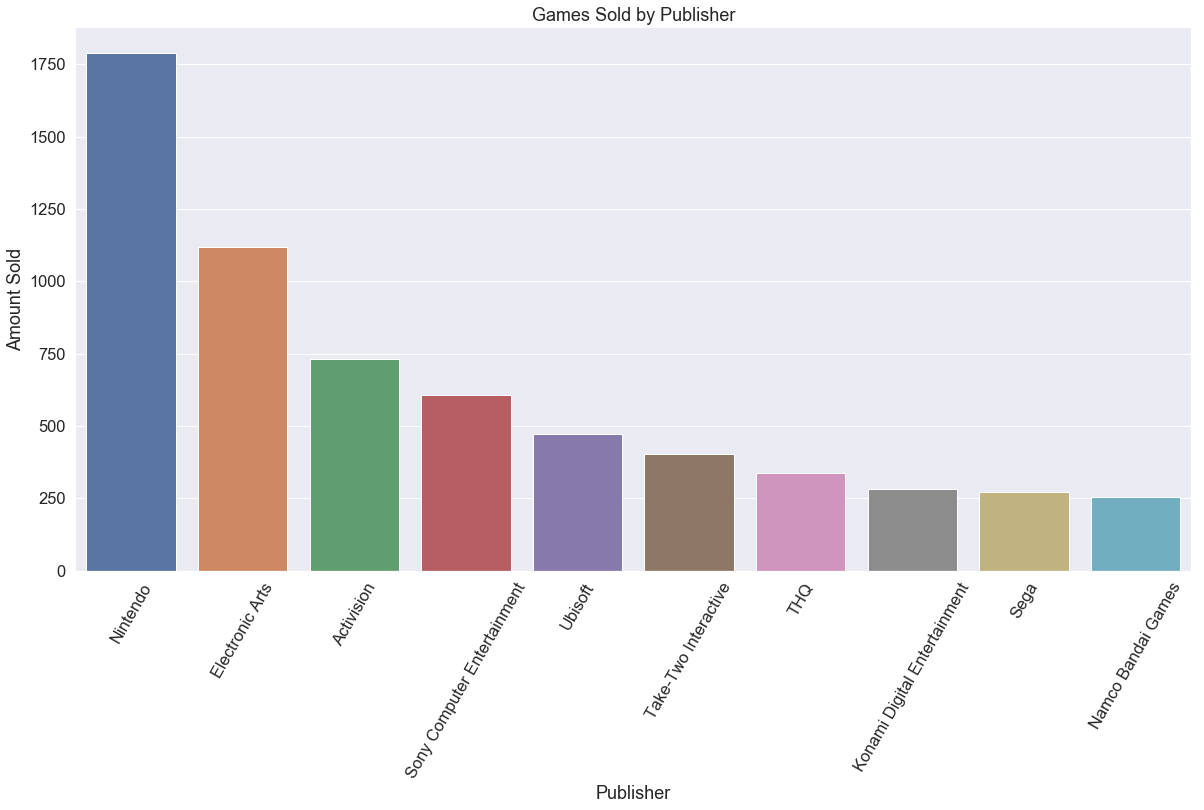

In [226]:
#Top publishers by games sold
vis_9 = sns.barplot(x='Publisher', y='Global_Sales', data=pub_salesx)
vis_9.set_title('Games Sold by Publisher')
vis_9.set_xlabel('Publisher')
vis_9.set_ylabel('Amount Sold')
_=vis_9.set_xticklabels(vis_9.get_xticklabels(), rotation=60)

Based on these two charts, it looks as though Electronic Arts released the most games during these years, but that doesn't necessarily mean they sold the most. Nintendo comes out on top. Guess the saying quality over quantity is true after all. Keeping that in mind, let's look at the quality of these games by user and critic scores next.

In [274]:
df = games[games['User_Count'] > 10].groupby('User_Count')['User_Score'].count()

Before we find the average User Score by Publisher, let's filter out the amount of User Scores lower than 10.0 to remove some biasly rated games.

In [275]:
filtered_users = games.loc[(games['User_Count'] > 10)]
filtered_users.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,75.525806,42.029032,7.485852,197.812925,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,75.525806,42.029032,7.485852,197.812925,NaN,NaN


In [276]:
user = filtered_users.groupby('Publisher', as_index=False).agg({'User_Score':'mean', 'Global_Sales':'sum'})
userx = user.nlargest(10, 'Global_Sales')
userx

,Publisher,User_Score,Global_Sales
139,Nintendo,7.500453,1771.89
57,Electronic Arts,6.203809,1037.87
9,Activision,4.546136,681.18
176,Sony Computer Entertainment,6.719481,581.84
214,Ubisoft,4.688379,430.94
199,Take-Two Interactive,5.854560,388.94
196,THQ,4.022633,278.09
110,Konami Digital Entertainment,4.986939,262.23
173,Sega,6.764934,256.24
127,Microsoft Game Studios,7.043439,245.87


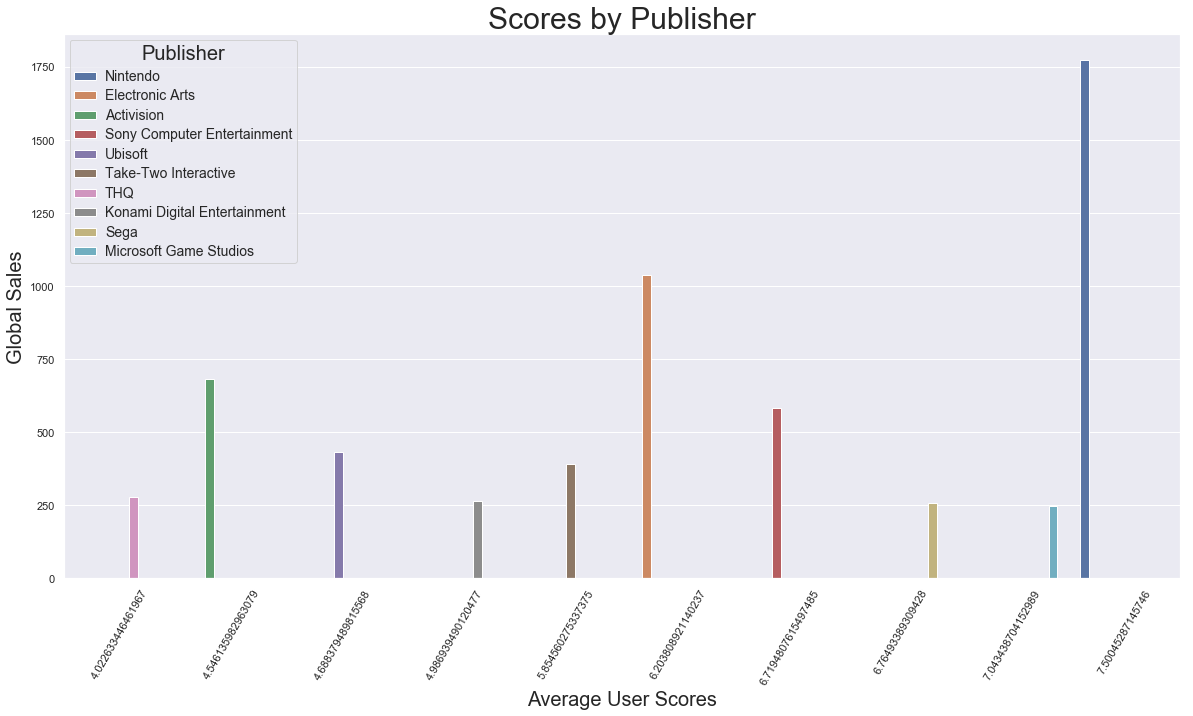

In [278]:
vis_10 = sns.barplot(x='User_Score', y='Global_Sales', hue = 'Publisher', data=userx)
vis_10.set_title('Scores by Publisher', fontsize=30)
vis_10.set_xlabel('Average User Scores', fontsize=20)
vis_10.set_ylabel('Global Sales', fontsize=20)
vis_10.set_xticklabels(vis_10.get_xticklabels(), rotation=60)
plt.setp(vis_10.get_legend().get_texts(), fontsize=14) # for legend text
_ = plt.setp(vis_10.get_legend().get_title(), fontsize=20) # for legend title

Let's do the same for our Critic Scores.

In [279]:
filtered_critics = games.loc[(games['Critic_Count'] > 10)]
filtered_critics.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.000000,51.000000,8.000000,322.000000,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,75.525806,42.029032,7.485852,197.812925,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.000000,73.000000,8.300000,709.000000,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.000000,73.000000,8.000000,192.000000,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,75.525806,42.029032,7.485852,197.812925,NaN,NaN


In [280]:
critic = filtered_critics.groupby('Publisher', as_index=False).agg({'Critic_Score':'mean', 'Global_Sales':'sum'})
criticx = critic.nlargest(10, 'Global_Sales')
criticx

,Publisher,Critic_Score,Global_Sales
143,Nintendo,75.678579,1779.60
58,Electronic Arts,75.528347,1052.25
10,Activision,71.130377,680.01
184,Sony Computer Entertainment,74.180933,585.45
218,Ubisoft,69.720950,431.75
207,Take-Two Interactive,76.517835,388.56
204,THQ,68.348029,284.66
181,Sega,70.096867,260.48
112,Konami Digital Entertainment,68.692957,253.41
130,Microsoft Game Studios,76.146259,248.14


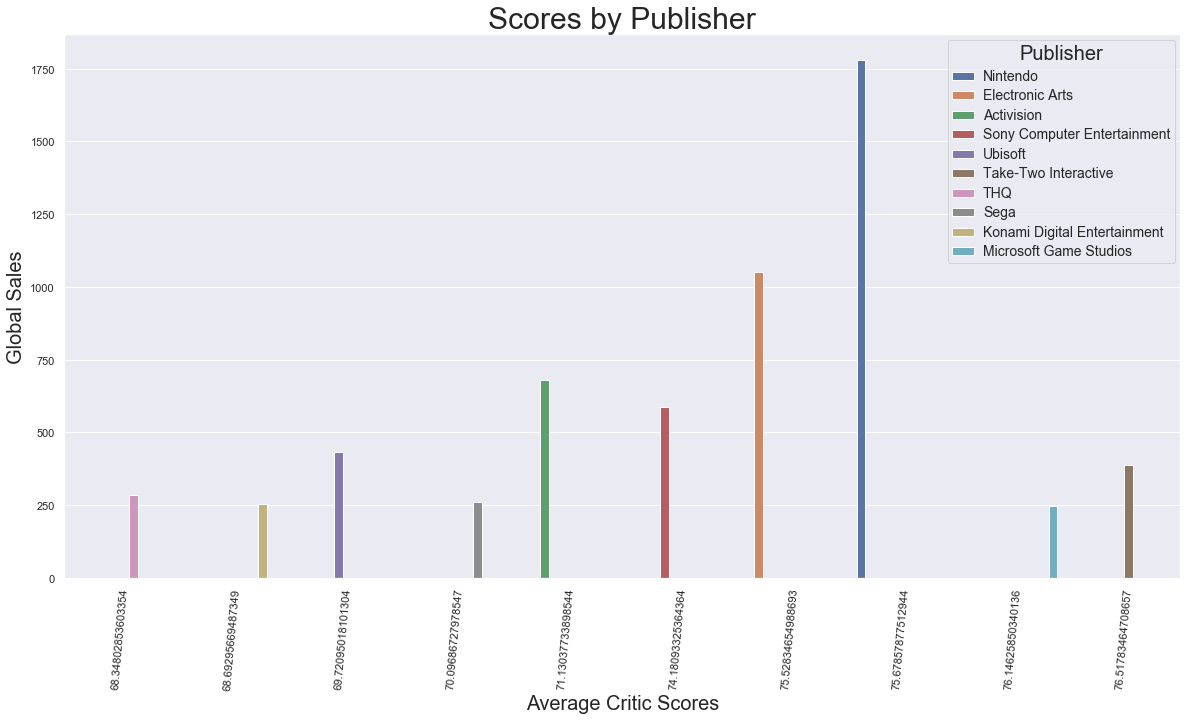

In [281]:
vis_11 = sns.barplot(x='Critic_Score', y='Global_Sales', hue = 'Publisher', data=criticx)
vis_11.set_title('Scores by Publisher', fontsize=30)
vis_11.set_xlabel('Average Critic Scores', fontsize=20)
vis_11.set_ylabel('Global Sales', fontsize=20)
vis_11.set_xticklabels(vis_11.get_xticklabels(), rotation=85)
plt.setp(vis_11.get_legend().get_texts(), fontsize=14) # for legend text
_ = plt.setp(vis_11.get_legend().get_title(), fontsize=20) # for legend title

Based on these two charts, it looks as if User Scores have a wider range of scores than Critic Scores do out of games that sold the most. In both charts, Nintendo seems to win the hearts of Users and Critics the most based on sales and with an average score of 75%.
Let's observe which region has sold the most with the following graph.

In [287]:
regions = games.groupby('Global_Sales', as_index=False).agg({'NA_Sales':'sum', 'EU_Sales': 'sum', 'JP_Sales':'sum',
                                                                'Other_Sales':'sum'})
regions.head()

,Global_Sales,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.01,1.57,1.68,3.17,0.00
1,0.02,5.50,5.16,9.58,0.02
2,0.03,7.35,6.28,10.48,0.60
3,0.04,9.63,5.43,9.38,0.83
4,0.05,13.50,6.30,9.89,1.14


In [283]:
sales=[]
places = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
regionx = regions.sum(axis = 0, skipna = True)
for i in range(1, len(regionx)):
    sales.append(regionx[i])
sales

[4402.619999999999, 2424.669999999999, 1297.3699999999992, 791.3400000000007]

In [284]:
d = {'Regions': places,
     'Sales': sales}
df_region = pd.DataFrame(data=d)
df_region

,Regions,Sales
0,NA_Sales,4402.62
1,EU_Sales,2424.67
2,JP_Sales,1297.37
3,Other_Sales,791.34


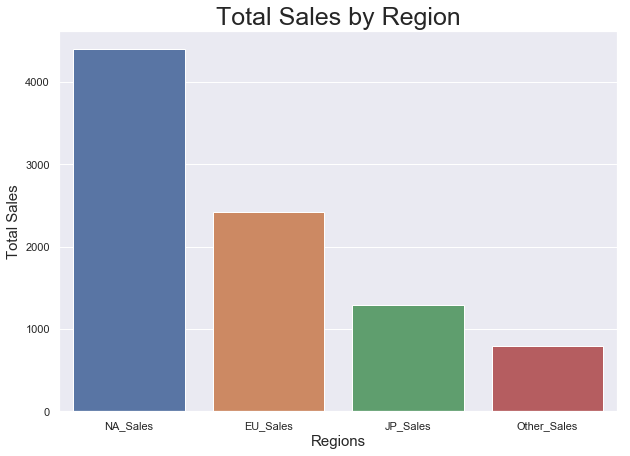

In [286]:
sns.set(rc={'figure.figsize':(10,7)})
vis_12 = sns.barplot(x='Regions', y='Sales', data=df_region)
vis_12.set_title('Total Sales by Region', fontsize=25)
vis_12.set_xlabel('Regions', fontsize=15)
vis_12.set_ylabel('Total Sales', fontsize=15)
_=vis_12.set_xticklabels(vis_12.get_xticklabels(), rotation=0)

Let's look further into this by graphing the total amount of sales for each region for each year.

In [248]:
sales_region = games.groupby('Year_of_Release', as_index=False).agg({'NA_Sales':'sum', 'EU_Sales': 'sum', 'JP_Sales':'sum',
                                                                'Other_Sales':'sum'})
sales_region.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980.0,10.59,0.67,0.00,0.12
1,1981.0,33.40,1.96,0.00,0.32
2,1982.0,26.92,1.65,0.00,0.31
3,1983.0,7.76,0.80,8.10,0.14
4,1984.0,33.28,2.10,14.27,0.70


In [249]:
s=[] #Sales of regions for the year
r1 = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'] #Names of regions to pick from.
r2= [] #Where names of regions will go to be paired up with total sales.
x=1980
y=[] #Years

for i in range(len(sales_region)):
    for j in range(1, len(sales_region.columns)):
        s.append(sales_region.iloc[i,j])
        r2.append(r1[j-1])
        y.append(x)
    x+=1

In [250]:
d = {'Year': y,
     'Regions': r2,
     'Sales': s}
df_regions_sales = pd.DataFrame(data=d)
df_regions_sales.head()

,Year,Regions,Sales
0,1980,NA_Sales,10.59
1,1980,EU_Sales,0.67
2,1980,JP_Sales,0.00
3,1980,Other_Sales,0.12
4,1981,NA_Sales,33.40


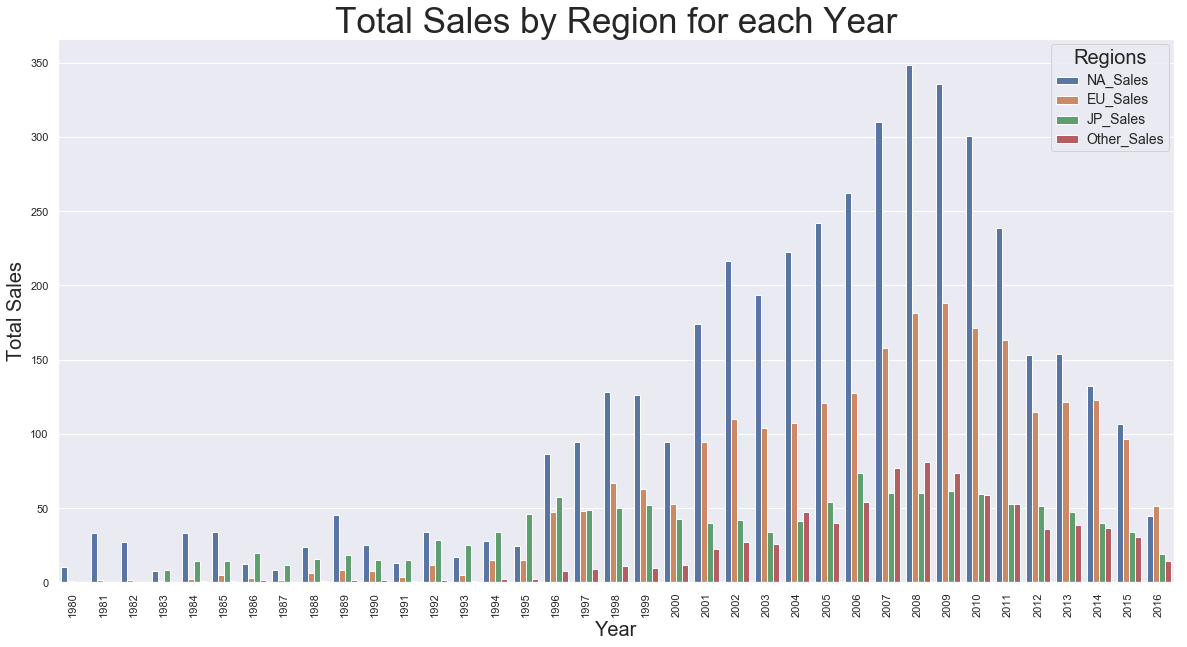

In [266]:
sns.set(font_scale=2)
sns.set(rc={'figure.figsize':(20,10)})
vis_13 = sns.barplot(x='Year', y='Sales', hue= 'Regions', data=df_regions_sales)
vis_13.set_title('Total Sales by Region for each Year', fontsize=35)
vis_13.set_xlabel('Year', fontsize=20)
vis_13.set_ylabel('Total Sales', fontsize=20)
vis_13.set_xticklabels(vis_13.get_xticklabels(), rotation=90)
plt.setp(vis_13.get_legend().get_texts(), fontsize=14) # for legend text
_ = plt.setp(vis_13.get_legend().get_title(), fontsize=20) # for legend title

Looks like North American sales dominated for nearly every year during 1980 to 2016.